# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [34]:
# imports
from panel.interact import interact
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

import hvplot.pandas

load_dotenv()


True

In [35]:
# Read the Mapbox API key

map_box_api=os.getenv("MAPBOX_TOKEN")
type(map_box_api)

str

In [36]:
px.set_mapbox_access_token(map_box_api)
type(map_box_api)

str

In [37]:
## Load Data

In [38]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [39]:
# Calculate the mean number of housing units per year (hint: use groupby) 

sfo_housing_mean=sfo_data.groupby("year")['housing_units'].mean().reset_index()



In [40]:
# Save the dataframe as a csv file
sfo_housing_mean.to_csv("housing_units_mean.csv")

<AxesSubplot:title={'center':'Average housing Units'}, xlabel='year'>

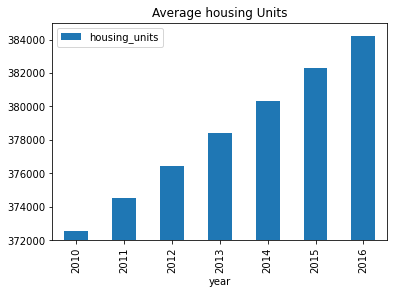

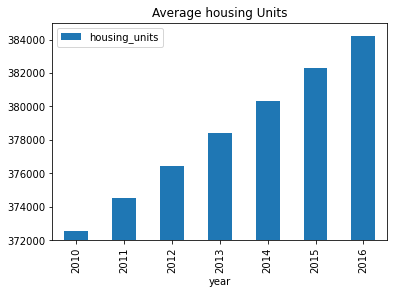

In [41]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

sfo_housing_mean.plot(x= 'year', y='housing_units', kind="bar", title = "Average housing Units", ylim=[372000,385000])

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
min= 372000
max= 385000

sfo_housing_mean.plot(x= 'year', y='housing_units',kind="bar", title = "Average housing Units", ylim=[min,max])

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [42]:
# Calculate the average sale price per square foot and average gross rent


avg_sales_price=sfo_data.groupby("year")["sale_price_sqr_foot"].mean().reset_index()


avg_rent_price=sfo_data.groupby("year")["gross_rent"].mean().reset_index() 




<AxesSubplot:title={'center':'Average Sales Price'}, xlabel='year'>

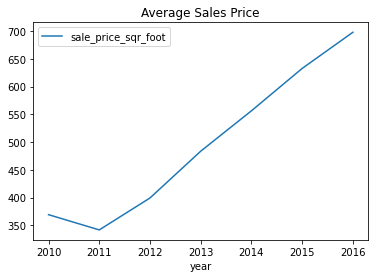

In [43]:
# Line chart for average sale price per square foot
avg_sales_price.plot(x= 'year', y='sale_price_sqr_foot', kind="line", title = "Average Sales Price")

<AxesSubplot:title={'center':'Average Rent Price'}, xlabel='year'>

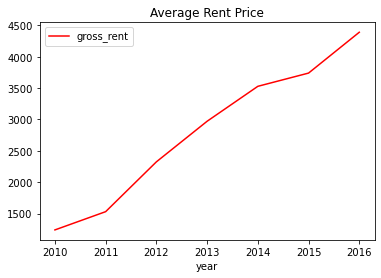

In [44]:
# Line chart for average montly rent
avg_rent_price.plot(x= 'year', y='gross_rent', kind="line", title = "Average Rent Price", colormap='autumn')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [45]:
# Group by year and neighborhood and then create a new dataframe of the mean values

sfo_means=sfo_data.groupby(['year','neighborhood']).mean()
sfo_means.head(2)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                
2010 Alamo Square           291.182945         372560        1239
     Anza Vista             267.932583         372560        1239

In [46]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

sfo_means.hvplot.line(x="year", y ='sale_price_sqr_foot', width=600,  title="Avg Price per sq ft", groupby='neighborhood')



:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [47]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
sfo_means.hvplot.line(x="year", y ='gross_rent', width=600,  title="Avg Monthly Rent", groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [48]:
# Plotting the data from the top 10 expensive neighborhoods

df_expensive_neighborhoods_10 = sfo_data.groupby(by="neighborhood").mean().head(10) \
 .sort_values("sale_price_sqr_foot", ascending=False).reset_index()

In [49]:
fig= px.bar(df_expensive_neighborhoods_10, x="neighborhood",y="sale_price_sqr_foot")

fig.show()

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [50]:
# Fetch Previous Data Frame and Plotting the data 
sfo_means.hvplot.line(x="year", y =['gross_rent', 'sale_price_sqr_foot'], value_label='Price', subplots=True, width=300,  title="Avg Monthly Costs", groupby='neighborhood')



:DynamicMap   [neighborhood]
   :NdLayout   [Variable]
      :Curve   [year]   (Price)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [51]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
loc_data = pd.read_csv(file_path)

loc_data.head()

,neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [52]:
# Calculate the mean values for each neighborhood
n_means=sfo_data.groupby('neighborhood').mean().reset_index()

In [53]:
n_means.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [54]:
# Join the average values with the neighborhood locations


avg_loc_df=pd.merge(loc_data,n_means,how="inner", on ="neighborhood")
avg_loc_df.head(5)

,neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [55]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
px.scatter_mapbox(avg_loc_df,
                 lat="Lat",
                 lon = "Lon",
                 size= "sale_price_sqr_foot",
                 color= "neighborhood",
                 zoom =4)

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [66]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean() \
 .sort_values("sale_price_sqr_foot", ascending=False).reset_index()


df_expensive_neighborhoods.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [68]:
# ParallelCategories Plot
def parallel_categories():
    expensive_categories_plot = px.parallel_categories(
        df_expensive_neighborhoods_10,
        color="sale_price_sqr_foot",
      )
    return expensive_categories_plot



In [69]:
parallel_categories()

In [65]:
# Parallel Coordinates Plot
def parallel_coordinates():
    expensive_coordinates_plot = px.parallel_coordinates(
        df_expensive_neighborhoods,
        color="sale_price_sqr_foot",
      )
    return expensive_coordinates_plot

In [60]:
parallel_coordinates()

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [63]:
# Sunburst Plot
def sunburst():
    expensive_sunburst_plot = px.sunburst(
        df_expensive_neighborhoods_10,
        color="sale_price_sqr_foot",
      )
    return expensive_sunburst_plot

In [64]:
sunburst()